###  Problem definition:
Prediction task to determine whether a person makes over 50k a year.

In [2]:
# Import modules
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
# Figures inline and set visualization style
%matplotlib inline
sns.set()

### Load dataset

In [3]:
# Import datasets
filename = '../data/adult.data'
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain','capital-loss', 'hours-per-week', 'native-country','income']
dataset = pd.read_csv(filename, delim_whitespace=True, names=names)

### Analyze Data

#### Descriptive Statistics

In [4]:
# shape
print(dataset.shape)

(32561, 15)


There are 32,561 instances to work with and the data has 15 attributes.

In [5]:
# data type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null object
workclass         32561 non-null object
fnlwgt            32561 non-null object
education         32561 non-null object
education-num     32561 non-null object
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null object
capital-loss      32561 non-null object
hours-per-week    32561 non-null object
native-country    32561 non-null object
income            32561 non-null object
dtypes: object(15)
memory usage: 3.7+ MB


The data types are objects, they need to be converted to corresponding str,int types
and there are no null values

In [6]:
# View the first lines of the dataset
dataset.head(n=4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,"39,","State-gov,","77516,","Bachelors,","13,","Never-married,","Adm-clerical,","Not-in-family,","White,","Male,","2174,","0,","40,","United-States,",<=50K
1,"50,","Self-emp-not-inc,","83311,","Bachelors,","13,","Married-civ-spouse,","Exec-managerial,","Husband,","White,","Male,","0,","0,","13,","United-States,",<=50K
2,"38,","Private,","215646,","HS-grad,","9,","Divorced,","Handlers-cleaners,","Not-in-family,","White,","Male,","0,","0,","40,","United-States,",<=50K
3,"53,","Private,","234721,","11th,","7,","Married-civ-spouse,","Handlers-cleaners,","Husband,","Black,","Male,","0,","0,","40,","United-States,",<=50K


In [7]:
# View the last lines of the dataset
dataset.tail(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32557,"40,","Private,","154374,","HS-grad,","9,","Married-civ-spouse,","Machine-op-inspct,","Husband,","White,","Male,","0,","0,","40,","United-States,",>50K
32558,"58,","Private,","151910,","HS-grad,","9,","Widowed,","Adm-clerical,","Unmarried,","White,","Female,","0,","0,","40,","United-States,",<=50K
32559,"22,","Private,","201490,","HS-grad,","9,","Never-married,","Adm-clerical,","Own-child,","White,","Male,","0,","0,","20,","United-States,",<=50K
32560,"52,","Self-emp-inc,","287927,","HS-grad,","9,","Married-civ-spouse,","Exec-managerial,","Wife,","White,","Female,","15024,","0,","40,","United-States,",>50K


In [8]:
# class distribution
print(dataset.groupby('income').size())

income
<=50K    24720
>50K      7841
dtype: int64


Looking at the breakdown of class values it shows that the classes are not reasonably balanced between '<=50K' and '>50K'

In [9]:
# Summarize the distribution of each attribute.
dataset.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,73,9,21648,16,16,7,15,6,5,2,119,92,94,42,2
top,"36,","Private,","203488,","HS-grad,","9,","Married-civ-spouse,","Prof-specialty,","Husband,","White,","Male,","0,","0,","40,","United-States,",<=50K
freq,898,22696,13,10501,10501,14976,4140,13193,27816,21790,29849,31042,15217,29170,24720


Data cleaning needs to be done to remove the ',' character in the attribute values and the '-' character from the headers.

The attributes listed need to be converted to numeric data types:
-age, 
-education_num, -capital_gain, -capital_loss, -hours_per_week

In [10]:
# Fix headers
dataset.rename(columns=lambda x: x.replace("-","_"), inplace=True)

In [11]:
# Remove ',' from values

dataset['fnlwgt'] = dataset.fnlwgt.apply(lambda x: x.replace(",",""))

dataset['age'] = dataset.age.apply(lambda x: x.replace(",",""))

dataset['workclass'] = dataset.workclass.apply(lambda x: x.replace(",",""))

dataset['education'] = dataset.education.apply(lambda x: x.replace(",",""))

dataset['education_num'] = dataset.education_num.apply(lambda x: x.replace(",",""))

dataset['marital_status'] = dataset.marital_status.apply(lambda x: x.replace(",",""))

dataset['occupation'] = dataset.occupation.apply(lambda x: x.replace(",",""))

dataset['relationship'] = dataset.relationship.apply(lambda x: x.replace(",",""))

dataset['race'] = dataset.race.apply(lambda x: x.replace(",",""))

dataset['sex'] = dataset.sex.apply(lambda x: x.replace(",",""))

dataset['capital_gain'] = dataset.capital_gain.apply(lambda x: x.replace(",",""))

dataset['capital_loss'] = dataset.capital_loss.apply(lambda x: x.replace(",",""))

dataset['hours_per_week'] = dataset.hours_per_week.apply(lambda x: x.replace(",",""))

dataset['native_country'] = dataset.native_country.apply(lambda x: x.replace(",",""))

In [12]:
# Convert attributes to numeric data types:
# -age, -education_num, -capital_gain, -capital_loss, -hours_per_week

dataset['age'] = dataset.age.apply(lambda x: int(x))

dataset['fnlwgt'] = dataset.fnlwgt.apply(lambda x: int(x))

dataset['capital_gain'] = dataset.capital_gain.apply(lambda x: int(x))

dataset['capital_loss'] = dataset.capital_loss.apply(lambda x: int(x))

dataset['hours_per_week'] = dataset.hours_per_week.apply(lambda x: int(x))

dataset['education_num'] = dataset.education_num.apply(lambda x: int(x))

In [13]:
# Binning numerical columns
dataset['cat_age'] = pd.qcut(dataset.age, q=7, labels=False )
dataset['cat_education_num']= pd.qcut(dataset.education_num, q=7, labels=False, duplicates='drop')
dataset['cat_capital_gain']= pd.qcut(dataset.capital_gain, q=7, labels=False, duplicates='drop')
dataset['cat_capital_loss']= pd.qcut(dataset.capital_loss, q=7, labels=False, duplicates='drop')
dataset['cat_hours_per_week']= pd.qcut(dataset.hours_per_week, q=7, labels=False, duplicates='drop')
dataset['cat_fnlwgt']= pd.qcut(dataset.fnlwgt, q=7, labels=False)
dataset.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,capital_loss,hours_per_week,native_country,income,cat_age,cat_education_num,cat_capital_gain,cat_capital_loss,cat_hours_per_week,cat_fnlwgt
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,40,United-States,<=50K,3,3,0,0,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,13,United-States,<=50K,5,3,0,0,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,40,United-States,<=50K,3,0,0,0,1,4
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,40,United-States,<=50K,5,0,0,0,1,5
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,40,Cuba,<=50K,1,3,0,0,1,6


### Data Visualizations
Visualizations of individual attributes. It is often useful to look at data
using multiple diferent visualizations in order to spark ideas. 

Below are histograms of each
attribute to get a sense of the data distributions.

#### Univariate plots to better understand each attribute.
Univariate [box and whisker plots]
Given that the input variables are numeric, we can create box and whisker plots of each.
This gives a clearer idea of the distribution of the input attributes

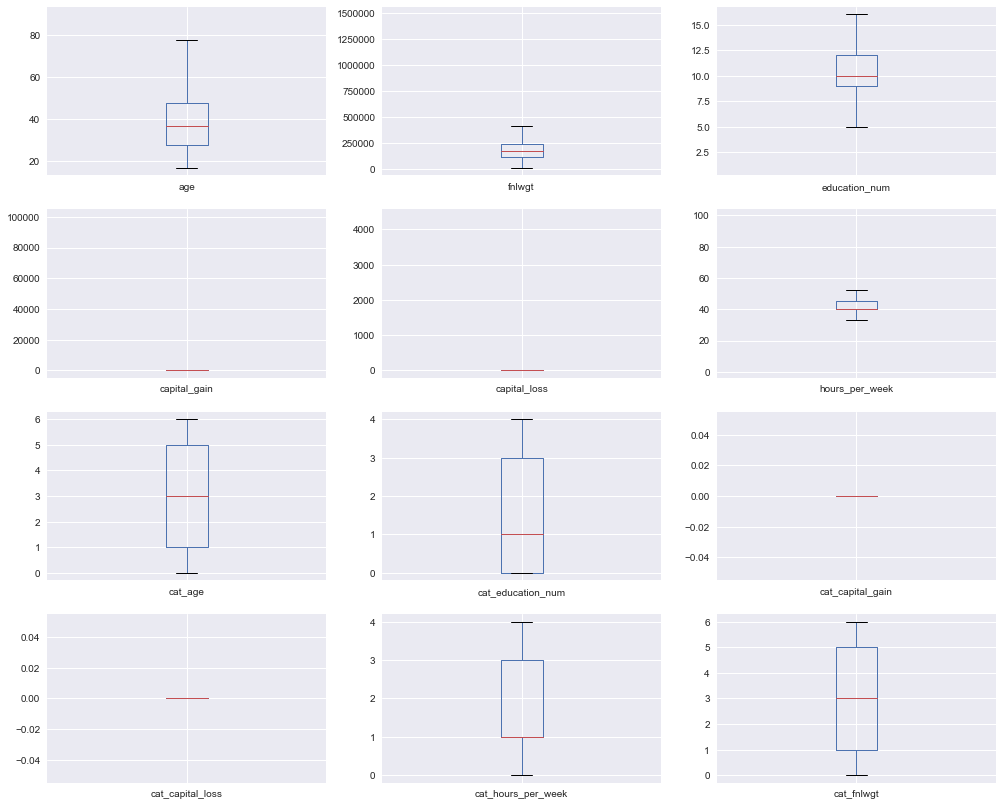

In [14]:
dataset.plot(kind='box', subplots=True, layout=(5,3), sharex=False, sharey=False, figsize=(17,18))
plt.show()

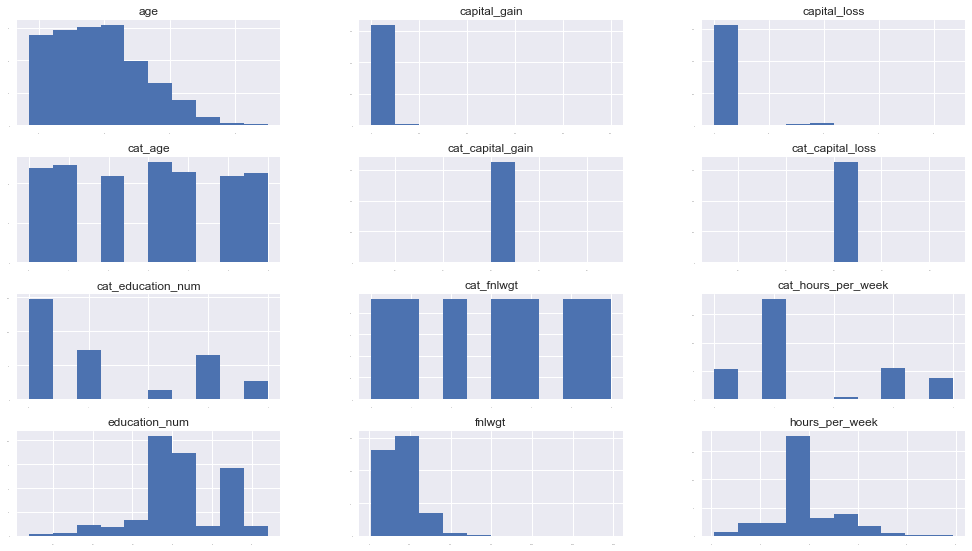

In [15]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1,figsize=(17,12),layout=(5,3))
plt.show()

In [16]:
# The same perspective of the data using density plots.
# dataset.plot(kind= 'density' , subplots=True, sharex=False, legend=False, fontsize=1,figsize=(17,12),layout=(5,3))
# plt.show()

The attributes look like they have a Gaussian distribution. 
This is useful to note as algorithms that can exploit this assumption can be used.

In [17]:
# capital_gain, capital_loss, cat_capital_gain and cat_capital_loss these attributes are not well distributed.
dataset = dataset.drop(['capital_gain', 'capital_loss', 'cat_capital_gain', 'cat_capital_loss'], axis=1)

In [18]:
dataset.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income,cat_age,cat_education_num,cat_hours_per_week,cat_fnlwgt
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,3,3,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,5,3,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,3,0,1,4
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,5,0,1,5
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,1,3,1,6


#### Multivariate plots to better understand the relationships between attributes.
Now we can look at the interactions between the variables.
First, let’s look at scatterplots of all pairs of attributes. 
This can be helpful to spot structured relationships between input variables.

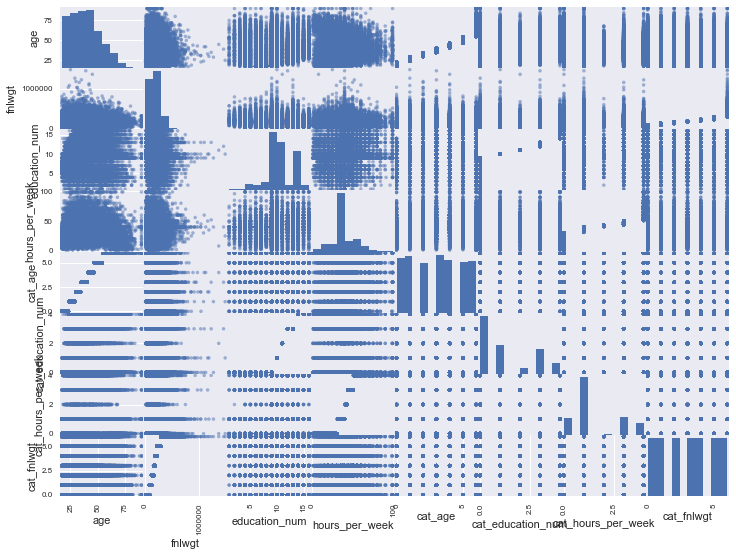

In [19]:
# scatter plot matrix
scatter_matrix(dataset,figsize=(12,9))
plt.show()

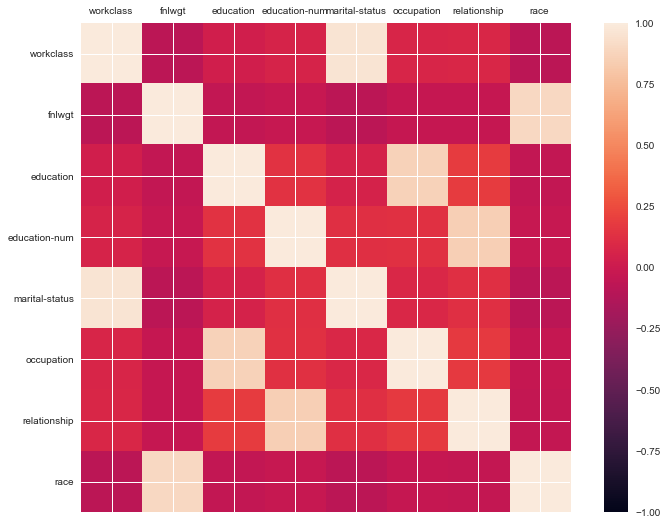

In [20]:
# correlation matrix 
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation= 'none' )
fig.colorbar(cax)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

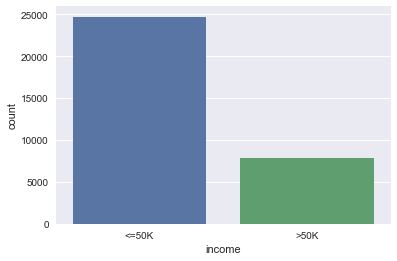

In [21]:
# Target variable: income
sns.countplot(x='income', data=dataset);

Less people hv income >50k

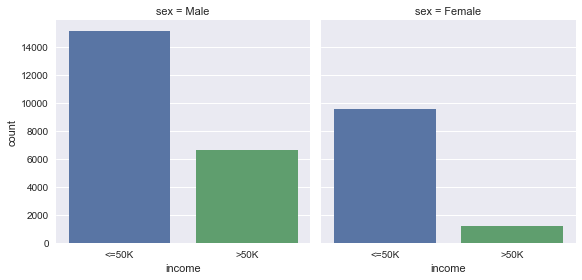

In [22]:
sns.factorplot(x='income', col='sex', kind='count', data=dataset);

A higher number of males earn income <=50k while 
A lower number of Females earn income >50k

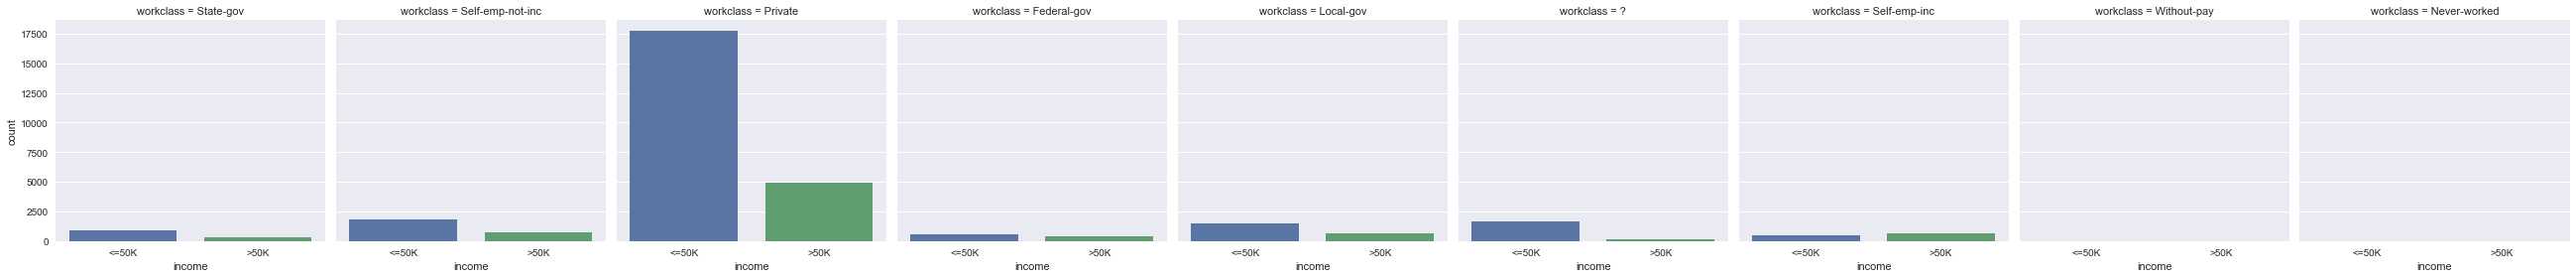

In [23]:
sns.factorplot(x='income', col='workclass', kind='count', data=dataset);

There is an obvious relationship between workclass "Private" and "Income", could it mean either male or female
as long as you have your own business you have a higher likelyhood of earning more, or not???

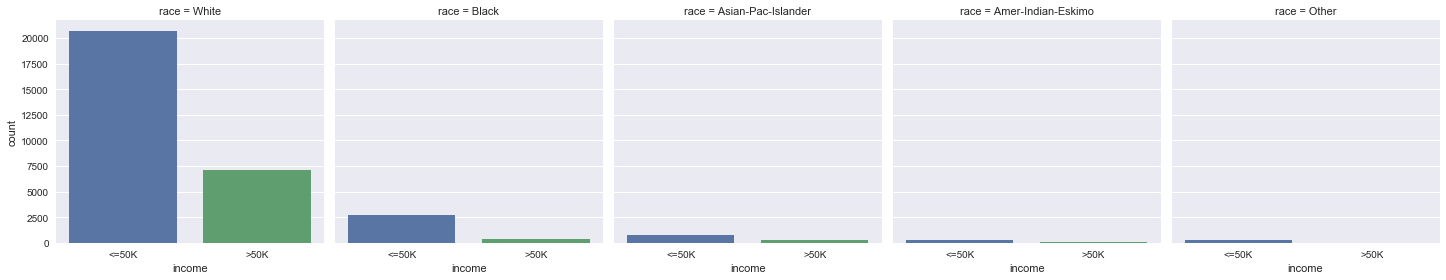

In [24]:
sns.factorplot(x='income', col='race', kind='count', data=dataset);

From the charts it is seen that white females that earn '>50k' also earn more than the sum of all other race incomes.  

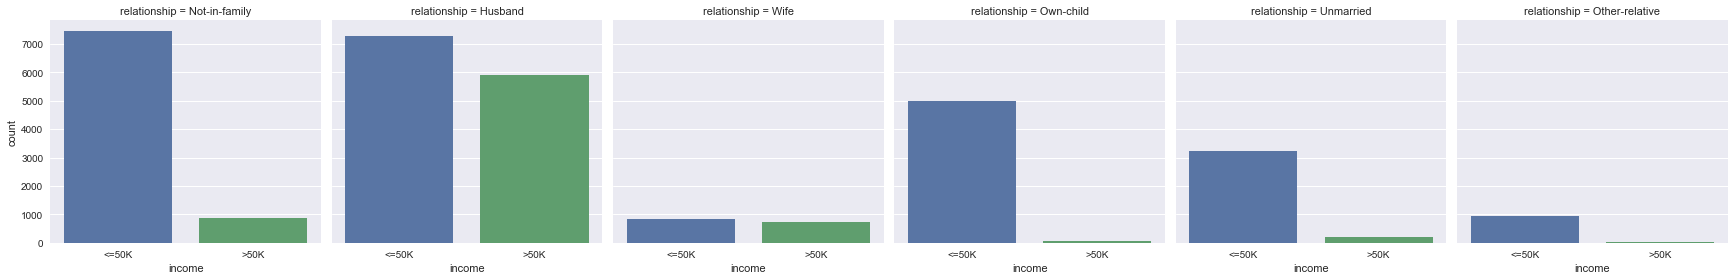

In [25]:
sns.factorplot(x='income', col='relationship', kind='count', data=dataset);

'Husband' with income '>50k' are more than the sum of both income categories except 'Not-In-Family'

In [ ]:
sns.factorplot(x='education', col='income', kind='count', data=dataset);

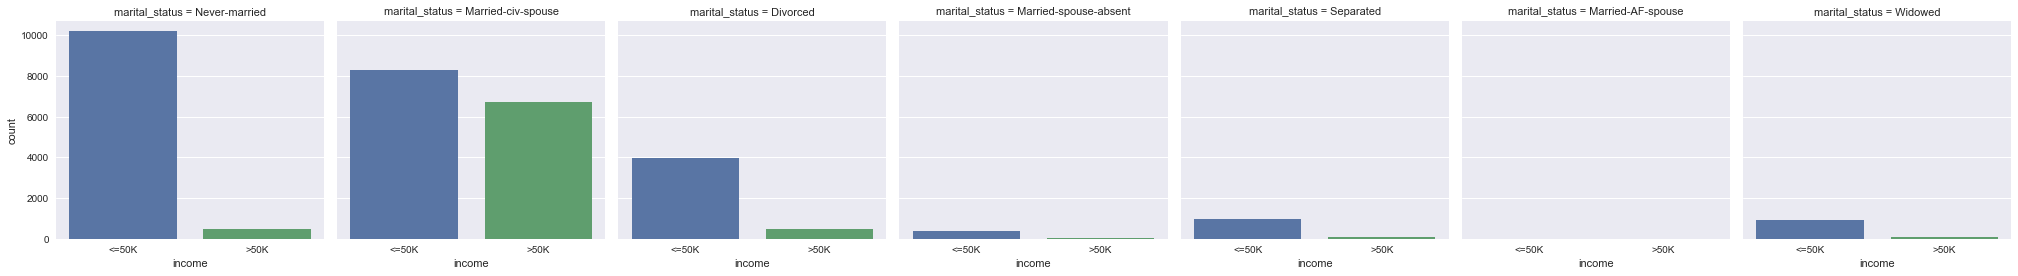

In [200]:
sns.factorplot(x='income', col='marital_status', kind='count', data=dataset);

Something definitely noticeable in the charts above :)

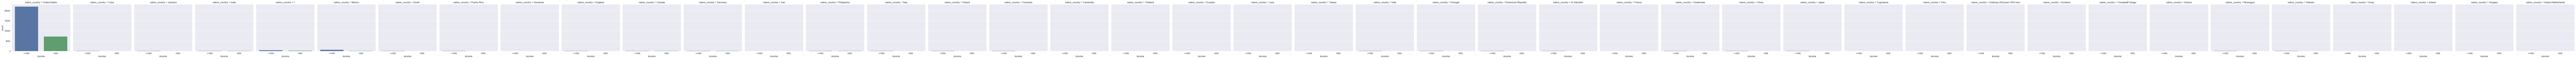

In [201]:
sns.factorplot(x='income', col='native_country', kind='count', data=dataset);



Convert "income" values to >50K is 1 and <=50K is 0, this will enable usage with more attributes
and as the target variable.

In [202]:
dataset['income'] = dataset.income.apply(lambda x: x.replace("<=50K","0"))
dataset['income'] = dataset.income.apply(lambda x: x.replace(">50K","1"))
dataset['income'] = dataset.income.apply(lambda x: int(x))

In [203]:
# select only numeric attributes
numeric_features = dataset.select_dtypes(include=[np.number])

The DataFrame.corr() method displays the correlation (or relationship) between the columns. 
We'll examine the correlations between the features and the target.

In [204]:
corr = numeric_features.corr()
print (corr['income'].sort_values(ascending=False)[:10], '\n')

income                1.000000
cat_education_num     0.339288
education_num         0.335154
cat_age               0.270129
cat_hours_per_week    0.263569
age                   0.234037
hours_per_week        0.229689
fnlwgt               -0.009463
cat_fnlwgt           -0.010084
Name: income, dtype: float64 



The first five features are the most positively correlated with "income", while the last one is the most negatively correlated.

In [205]:
# remove attribute to fix high correlation issue
del dataset['native_country']

In [206]:
# Transform into binary variables
dataset_dum = pd.get_dummies(dataset, drop_first=True)
dataset_dum.head()

,age,fnlwgt,education_num,hours_per_week,income,cat_age,cat_education_num,cat_hours_per_week,cat_fnlwgt,workclass_Federal-gov,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,77516,13,40,0,3,3,1,0,0,...,1,0,0,0,0,0,0,0,1,1
1,50,83311,13,13,0,5,3,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,38,215646,9,40,0,3,0,1,4,0,...,1,0,0,0,0,0,0,0,1,1
3,53,234721,7,40,0,5,0,1,5,0,...,0,0,0,0,0,0,1,0,0,1
4,28,338409,13,40,0,1,3,1,6,0,...,0,0,0,0,1,0,1,0,0,0


In [207]:
numeric_features2 = dataset_dum.select_dtypes(include=[np.number])
corr2 = numeric_features2.corr()
print (corr2['income'].sort_values(ascending=False)[:20], '\n')

income                               1.000000
marital_status_Married-civ-spouse    0.444696
cat_education_num                    0.339288
education_num                        0.335154
cat_age                              0.270129
cat_hours_per_week                   0.263569
age                                  0.234037
hours_per_week                       0.229689
sex_Male                             0.215980
occupation_Exec-managerial           0.214861
occupation_Prof-specialty            0.185866
education_Bachelors                  0.180485
education_Masters                    0.174570
education_Prof-school                0.154907
workclass_Self-emp-inc               0.139467
education_Doctorate                  0.132572
relationship_Wife                    0.123264
race_White                           0.085224
workclass_Federal-gov                0.059372
workclass_Local-gov                  0.033091
Name: income, dtype: float64 



In [208]:
dataset_dum['income_target'] = dataset_dum.income.apply(lambda x: int(x))

In [209]:
del dataset_dum['income']

In [210]:
for col in dataset_dum.columns:
    print(col)

age
fnlwgt
education_num
hours_per_week
cat_age
cat_education_num
cat_hours_per_week
cat_fnlwgt
workclass_Federal-gov
workclass_Local-gov
workclass_Never-worked
workclass_Private
workclass_Self-emp-inc
workclass_Self-emp-not-inc
workclass_State-gov
workclass_Without-pay
education_11th
education_12th
education_1st-4th
education_5th-6th
education_7th-8th
education_9th
education_Assoc-acdm
education_Assoc-voc
education_Bachelors
education_Doctorate
education_HS-grad
education_Masters
education_Preschool
education_Prof-school
education_Some-college
marital_status_Married-AF-spouse
marital_status_Married-civ-spouse
marital_status_Married-spouse-absent
marital_status_Never-married
marital_status_Separated
marital_status_Widowed
occupation_Adm-clerical
occupation_Armed-Forces
occupation_Craft-repair
occupation_Exec-managerial
occupation_Farming-fishing
occupation_Handlers-cleaners
occupation_Machine-op-inspct
occupation_Other-service
occupation_Priv-house-serv
occupation_Prof-specialty
occupa

In [211]:
dataset_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 62 columns):
age                                     32561 non-null int64
fnlwgt                                  32561 non-null int64
education_num                           32561 non-null int64
hours_per_week                          32561 non-null int64
cat_age                                 32561 non-null int64
cat_education_num                       32561 non-null int64
cat_hours_per_week                      32561 non-null int64
cat_fnlwgt                              32561 non-null int64
workclass_Federal-gov                   32561 non-null uint8
workclass_Local-gov                     32561 non-null uint8
workclass_Never-worked                  32561 non-null uint8
workclass_Private                       32561 non-null uint8
workclass_Self-emp-inc                  32561 non-null uint8
workclass_Self-emp-not-inc              32561 non-null uint8
workclass_State-gov                  

In [212]:
#from sklearn import decomposition
#pca = decomposition.PCA(n_components=3)
#pca.fit(dataset_dum)

In [213]:
#X = pca.transform(dataset_dum)

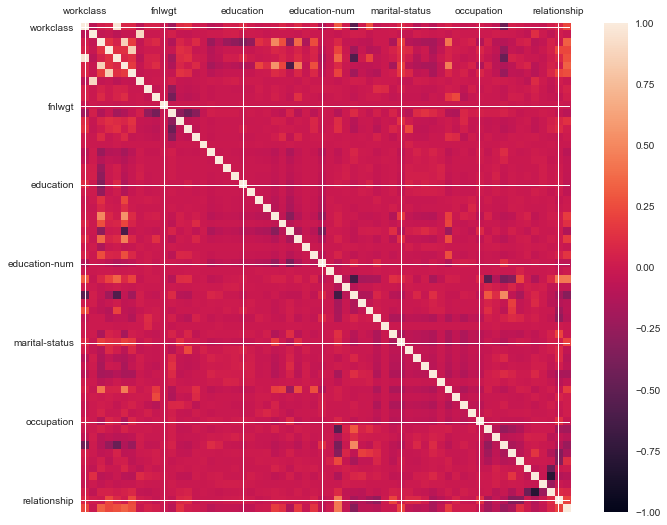

In [214]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset_dum.corr(), vmin=-1, vmax=1, interpolation= 'none' )
fig.colorbar(cax)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

### Validation Dataset
This is a sample of the data that we hold
back from our analysis and modeling. We use it right at the end of our project to confirm the
accuracy of our final model. It is a smoke test that we can use to see if we messed up and to
give us confidence on our estimates of accuracy on unseen data. We will use 80% of the dataset
for modeling and hold back 20% for validation.

In [217]:
# Split-out validation dataset
array = dataset_dum.values
X = array[:,0:61].astype(float)
Y = array[:,61]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

### Evaluate Algorithms: Baseline
We don’t know what algorithms will do well on this dataset. Gut feel suggests distance based
algorithms like k-Nearest Neighbors and Support Vector Machines may do well. Let’s design
our test harness. We will use 10-fold cross-validation. The dataset is not too small and this is
a good standard test harness configuration. We will evaluate algorithms using the accuracy
metric. This is a gross metric that will give a quick idea of how correct a given model is. More
useful on binary classification problems like this one.

In [218]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

Let’s create a baseline of performance on this problem and spot-check a number of different
algorithms. We will select a suite of different algorithms capable of working on this classification
problem. 

The six algorithms selected include:

Linear Algorithms: Logistic Regression (LR) and Linear Discriminant Analysis (LDA).

Nonlinear Algorithms: Classification and Regression Trees (CART), Support Vector
Machines (SVM), Gaussian Naive Bayes (NB) and k-Nearest Neighbors (KNN).

In [219]:
# Spot-Check Algorithms
models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'LDA' , LinearDiscriminantAnalysis()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'NB' , GaussianNB()))
models.append(( 'SVM' , SVC()))

The algorithms all use default tuning parameters. Let’s compare the algorithms. We will
display the mean and standard deviation of accuracy for each algorithm as we calculate it and
collect the results for use later.

In [220]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.758945 (0.008359)


/Users/segunadelowo/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/segunadelowo/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/segunadelowo/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/segunadelowo/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/segunadelowo/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/segunadelowo/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarn

LDA: 0.835227 (0.010293)
KNN: 0.720823 (0.008873)
CART: 0.776221 (0.007405)
NB: 0.794687 (0.008750)
SVM: 0.759060 (0.006475)


Linear Discriminant Analysis has the best accuracy score followed by Gaussian NB.
The variables that are collinear need to be looked into.

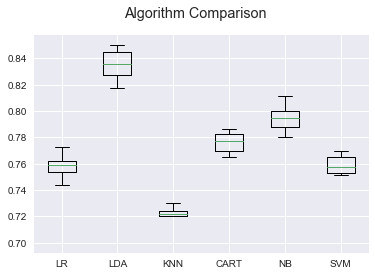

In [221]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Feature engieering will be reviewed for features to drop and features to add to improve the model

In [222]:
# Alternative approach 

from sklearn import tree
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
dep = np.arange(1,9)
param_grid = {'max_depth' : dep}

# Instantiate a decision tree classifier: clf
clf = tree.DecisionTreeClassifier()

# Instantiate the GridSearchCV object: clf_cv
clf_cv = GridSearchCV(clf, param_grid=param_grid, cv=5)

# Fit it to the data
clf_cv.fit(X, Y)

# Print the tuned parameter and score
print("Tuned Decision Tree Parameters: {}".format(clf_cv.best_params_))
print("Best score is {}".format(clf_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 7}
Best score is 0.830901999324345
